## 6.5 Machine Learning - Clustering

### This script contains the following:

#### 1. Import libraries and data
#### 2. Data prep
#### 3. The elbow technique
#### 4. K-means clustering
    4.1 Visualizations
    4.2 Descriptive statistics and insights
#### 5. Export data

#### 1. Import libraries and data

In [6]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [10]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [12]:
#Import Data
path =r'C:\Users\north\10-2024 Exploring Chocolate Bar Quality\02 Data\Prepared Data'
df_cacao=pd.read_csv(os.path.join(path,'cleaned_cacao_data_with_mapped_regions.csv'))

#### 2. Data prep

In [15]:
df_cacao.head()

,Company,Bean Origin,Reference,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Region_Final
0,A. Morin,Agua Grande,1876.0,2016,0.63,France,3.75,Unknown,São Tomé and Principe,São Tomé and Principe
1,A. Morin,Kpime,1676.0,2015,0.70,France,2.75,Unknown,Togo,Togo
2,A. Morin,Atsane,1676.0,2015,0.70,France,3.00,Unknown,Togo,Togo
3,A. Morin,Akata,1680.0,2015,0.70,France,3.50,Unknown,Togo,Togo
4,A. Morin,Quilla,1704.0,2015,0.70,France,3.50,Unknown,Peru,Peru


In [31]:
#Select and prepare numerical data
numerical_columns = ['Review Date', 'Cocoa Percent', 'Rating']
data_numerical = df_cacao[numerical_columns]

In [33]:
data_numerical

,Review Date,Cocoa Percent,Rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50
...,...,...,...
1786,2011,0.70,3.75
1787,2011,0.65,3.00
1788,2011,0.65,3.50
1789,2011,0.62,3.25


**Note:** Reference column is excluded as it works  just an identifier (ID) and doesn't carry any meaningful numerical value for clustering.

In [37]:
#Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

In [39]:
data_scaled

array([[ 1.255738  , -0.08226559,  1.1806357 ],
       [ 0.91399256, -0.06635145, -0.91502192],
       [ 0.91399256, -0.06635145, -0.39110752],
       ...,
       [-0.45298921, -0.07771869,  0.6567213 ],
       [-0.45298921, -0.08453904,  0.13280689],
       [-0.79473466, -0.07771869, -0.39110752]])

In [41]:
# Convert the standardized data back to a DataFrame for easier manipulation
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_columns)

#### 3. The elbow technique

In [50]:
# Use Elbow Method to determine optimal k
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

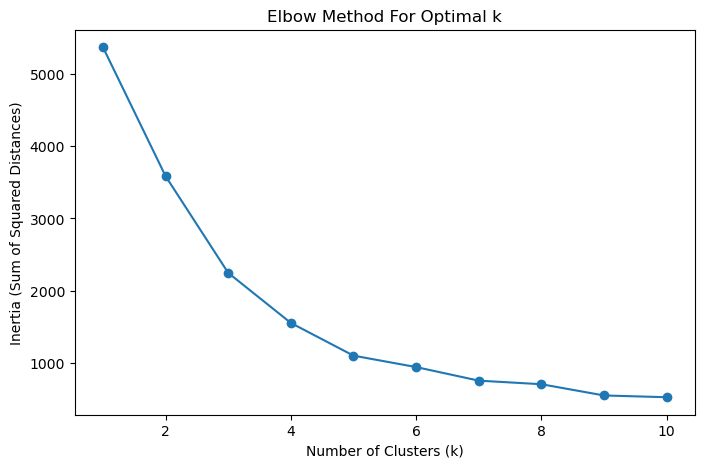

In [52]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

The curve begins to flatten around 3 clusters. After 3, the reduction in inertia becomes less significant, indicating that adding more clusters would not significantly improve the model’s fit. The ideal number of clusters for this dataset is 3.

#### 4. K-means clustering

In [56]:
# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled_df)

In [72]:
# Add the cluster labels to the original dataset
df_cacao['Cluster'] = clusters

In [70]:
df_cacao.head()

,Company,Bean Origin,Reference,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Region_Final,Cluster
0,A. Morin,Agua Grande,1876.0,2016,0.63,France,3.75,Unknown,São Tomé and Principe,São Tomé and Principe,0
1,A. Morin,Kpime,1676.0,2015,0.70,France,2.75,Unknown,Togo,Togo,0
2,A. Morin,Atsane,1676.0,2015,0.70,France,3.00,Unknown,Togo,Togo,0
3,A. Morin,Akata,1680.0,2015,0.70,France,3.50,Unknown,Togo,Togo,0
4,A. Morin,Quilla,1704.0,2015,0.70,France,3.50,Unknown,Peru,Peru,0


In [76]:
df_cacao['Cluster'].value_counts()

Cluster
0    1128
2     656
1       7
Name: count, dtype: int64

##### 4.1 Visualizations

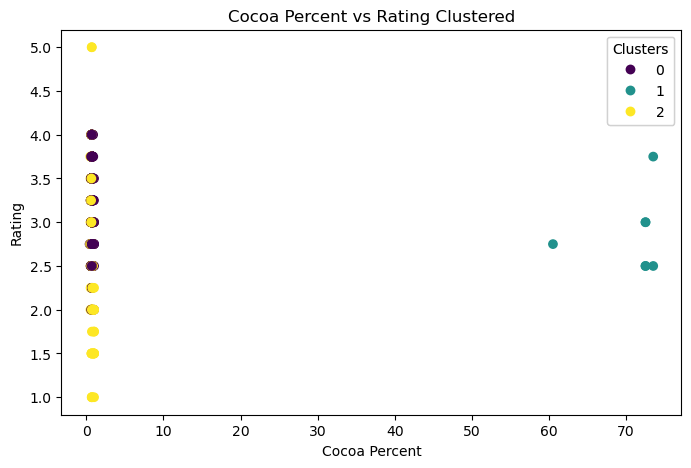

In [103]:
# Visualize the clusters with scatterplots and include a legend for clusters
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df_cacao['Cocoa Percent'], df_cacao['Rating'], c=clusters, cmap='viridis')

# Add title and labels
plt.title('Cocoa Percent vs Rating Clustered')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')

# Create a legend with cluster numbers
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)

plt.show()

**Cocoa Percent vs Rating Clustered**

- Low Cocoa Percent (0%) dominates: Most of the products in the dataset have very low cocoa percentages (Cluster 0 and Cluster 2). The separation between the purple and yellow clusters seems to be based on their ratings—with purple getting higher ratings on average and yellow getting lower ratings.
- High Cocoa Percent (60-70%) is rare: The few green points (Cluster 1) with high cocoa content are outliers in the dataset, and they receive mid-to-high ratings. This suggests that there are fewer high-cocoa products overall, but they tend to be well-regarded.

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

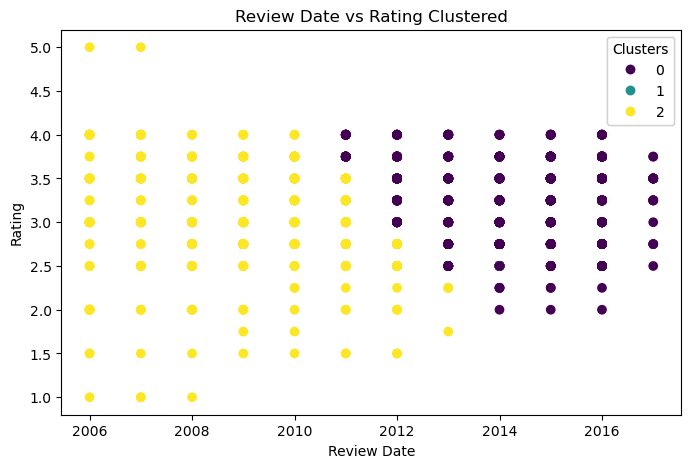

In [96]:
# Visualize clusters using the original Review Date (non-standardized) and Rating
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df_cacao['Review Date'], df_cacao['Rating'], c=df_cacao['Cluster'], cmap='viridis')

# Add title and labels
plt.title('Review Date vs Rating Clustered')
plt.xlabel('Review Date')
plt.ylabel('Rating')

# Create a legend with cluster numbers
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)

plt.show()


**Review Date vs Rating Clustered**

- There’s a clear pattern over time. The older reviews (from 2006–2010) tend to fall into one cluster (yellow), while more recent reviews (2012–2016) mostly fall into another (purple), with some overlap in the middle.
  
- This suggests that product ratings have changed over time. Newer reviews seem to be in a different cluster than older ones, which could reflect changing consumer preferences, evolving product quality, or market trends.

- It looks like the clusters reflect a time-based trend, showing that reviews from different periods tend to group together. This could be useful for understanding how product perceptions have shifted over time.

In [116]:
# Rename clusters to more descriptive labels (optional)
df_cacao.loc[df_cacao['Cluster'] == 2, 'Cluster'] = 'Yellow'
df_cacao.loc[df_cacao['Cluster'] == 1, 'Cluster'] = 'Green'
df_cacao.loc[df_cacao['Cluster'] == 0, 'Cluster'] = 'Purple'

# Calculate descriptive statistics for each cluster
cluster_stats = df_cacao.groupby('Cluster').agg({
    'Review Date': ['mean', 'median'], 
    'Cocoa Percent': ['mean', 'median'], 
    'Rating': ['mean', 'median']
})


In [118]:
cluster_stats

Review Date         Cocoa Percent           Rating       
                mean  median          mean median      mean median
Cluster                                                           
Green    2012.714286  2014.0     71.071429   72.5  2.857143   2.75
Purple   2014.190603  2014.0      0.718005    0.7  3.270612   3.25
Yellow   2009.114329  2009.0      0.714939    0.7  3.045732   3.00

#### 4.2 Descriptive statistics and insights

#### **Green Cluster**:
- **Review Date**: These products are the most recently reviewed, with an average review year of **2012.7** and a median of **2014**. This indicates that the products in this cluster are relatively new compared to the others.
- **Cocoa Percent**: The green cluster includes products with the highest cocoa content, averaging **71.07%** and a median of **72.5%**. This suggests these are dark chocolates with higher cocoa content, generally appreciated by a niche audience.
- **Rating**: These products have the lowest average rating, around **2.86**, with a median rating of **2.75**. Despite their higher cocoa content, they receive lower ratings, possibly due to the strong taste that may not appeal to a broad consumer base.

**Insight**: The **green cluster** likely represents high-cocoa products (dark chocolates), which are more recent but not highly rated, possibly due to the intense flavor profile that might not be as widely appreciated.

---

#### **Purple Cluster**:
- **Review Date**: The average review year is **2014.2**, and the median is **2014**. These are also relatively recent products but not quite as new as those in the green cluster.
- **Cocoa Percent**: These products have an average cocoa percentage of **71.8%**, and a median of **70%**, similar to the green cluster. However, these products are more varied and could still represent darker chocolates.
- **Rating**: This cluster has a higher average rating of **3.27** and a median rating of **3.25**, indicating that these products are better received than those in the green cluster.

**Insight**: The **purple cluster** represents higher-rated products with moderately high cocoa content. These products are fairly recent and more favorably received, indicating that they strike a better balance in flavor or quality, appealing to a broader audience.

---

#### **Yellow Cluster**:
- **Review Date**: These products have the oldest review dates, with an average of **2009.1** and a median of **2009**. This suggests that the products in this cluster have been on the market longer or were reviewed earlier.
- **Cocoa Percent**: The average cocoa percentage is **71.5%**, with a median of **70%**, similar to the purple cluster. This indicates that these products also tend to have higher cocoa content.
- **Rating**: These products have a slightly lower average rating of **3.05**, with a median of **3.0**, indicating that while these products aren't rated poorly, they aren't as highly rated as the purple cluster.

**Insight**: The **yellow cluster** represents older products that have been around for a while, with moderately high cocoa content and mid-range ratings. These products might be more established but do not stand out in terms of consumer reception.

---

### Overall Insights:
- The **green cluster** includes high-cocoa, newer products with lower ratings, possibly due to their intense flavor.
- The **purple cluster** contains more balanced, highly rated products with high cocoa content, appealing to a broader audience.
- The **yellow cluster** represents older products with mid-range ratings and a consistent level of cocoa content.

These clusters provide insight into how review date, cocoa content, and consumer ratings interact. However, further exploration of other features like **company**, **company location**, **region** could offer more depth into what drives the higher ratings in the purple cluster compared to the others.


#### Possible future steps:

- Green Cluster (High Cocoa, Lower Ratings): Focus on how Cocoa Percent and Region influence the lower ratings. Investigate whether certain regions are producing high-cocoa products that aren’t as well received and if adjustments can be made.

- Purple Cluster (Moderate Cocoa, Higher Ratings): Explore how Company Location and Region affect the higher ratings. This can help identify regions or companies producing well-regarded products and guide future product development.

- Yellow Cluster (Older Products, Mid-Range Ratings): Analyze how Region and Review Date impact ratings in this cluster. Investigate if products from certain regions are aging poorly or need improvements to boost customer satisfaction.

#### 5. Export data

In [133]:
df_cacao.to_csv(os.path.join(path, 'cleaned_cacao_data_mapped_clustered.csv'))